### TODO
- latency compared with ebpf x2 (load 0, load 3/13)
- rate compared with ebpf x2 (load 0, load 3/13)
- latency average over working point (up to 50% max) at all loads (0,1,2,3...)
- max rate at all loads (0,1,2,3,...)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
FOLDER = "output/"
CONN_LIST1 = [*range(1,60), *range(60,100,2), *range(100,201,5)]
# CONN_LIST3 = [*range(1,60), *range(60,101,2)]
CONN_LIST2 = [*range(1,60), *range(60,81,2)]
COLUMNS = ["conn", "req_num", "latency", "rate"]
TEST_LIST2 = ["0-", "1-", "2-", "3-", "5-", "20-"]
TEST_LIST1 = ["0-"]
# TEST_LIST2 = ["5-", "20-"]
# TEST_LIST3 = ["5-"]
LAT_LIMIT = 40
RATE_RANGES = {
    "0-": [*range(100, 131, 5)],
    "1-": [*range(54, 67, 2)],
    "2-": [*range(50, 62, 2)],
    "3-": [*range(50, 80, 2)],
    "5-": [*range(50, 80, 2)],
    "20-": [*range(50, 80, 2)]
}


In [4]:
# results = dict()
# for test in TEST_LIST:
#     latencies = list()
#     rates = list()
#     for conn in CONN_LIST:
#     # for conn in [1]:
#         df = pd.read_csv(f"{FOLDER}{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
#         # print(df.describe())
#         row = df.median()
#         row = df.mean()
#         df_ebpf = pd.read_csv(f"{FOLDER}ebpf-{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
#         row_ebpf = df_ebpf.median()
#         row_ebpf = df_ebpf.mean()
#         lat_increase = row_ebpf["latency"] / row["latency"] - 1
#         rate_decrease = 1 - row_ebpf["rate"] / row["rate"]
#         latencies.append(lat_increase)
#         rates.append(rate_decrease)
#     results[test] = {"latencies": latencies, "rates": rates}

In [5]:
df_5 = pd.read_csv(f"{FOLDER}ebpf-20-20.csv", index_col=None, header=None, names=COLUMNS)
df_5.describe()
df_5.iloc[-498:].describe()

,conn,req_num,latency,rate
count,498.0,498.0,498.000000,498.000000
mean,20.0,2000.0,36.926420,541.193936
std,0.0,0.0,0.661219,13.452076
min,20.0,2000.0,32.396500,510.630000
25%,20.0,2000.0,36.609900,535.332500
50%,20.0,2000.0,36.968600,539.560000
75%,20.0,2000.0,37.283225,545.017500
max,20.0,2000.0,38.919100,716.010000


In [6]:
results1 = dict()
for test in TEST_LIST1:
    latencies = list()
    rates = list()
    ebpf_lat = list()
    ebpf_rate = list()
    for conn in CONN_LIST1:
    # for conn in [1]:
        df = pd.read_csv(f"{FOLDER}{test}{conn}.csv", index_col=None, header=None, names=COLUMNS).iloc[-498:]
        # print(df.describe())
        row = df.median()
        row = df.mean()
        df_ebpf = pd.read_csv(f"{FOLDER}ebpf-{test}{conn}.csv", index_col=None, header=None, names=COLUMNS).iloc[-498:]
        row_ebpf = df_ebpf.median()
        row_ebpf = df_ebpf.mean()
        lat_increase = row_ebpf["latency"]
        rate_decrease = row_ebpf["rate"]
        latencies.append(row["latency"])
        rates.append(row["rate"])
        ebpf_lat.append(lat_increase)
        ebpf_rate.append(rate_decrease)
    results1[test] = {"latencies": latencies,
                    "rates": rates,
                    "ebpf_latencies": ebpf_lat,
                    "ebpf_rates": ebpf_rate}


In [7]:
results2 = dict()
for test in TEST_LIST2:
    if test == "0-":
        CONN_LIST = CONN_LIST1
    else:
        CONN_LIST = CONN_LIST2
    latencies = list()
    rates = list()
    ebpf_lat = list()
    ebpf_rate = list()
    for conn in CONN_LIST:
        df = pd.read_csv(f"{FOLDER}{test}{conn}.csv", index_col=None, header=None, names=COLUMNS).iloc[-498:]
        row = df.mean()
        df_ebpf = pd.read_csv(f"{FOLDER}ebpf-{test}{conn}.csv", index_col=None, header=None, names=COLUMNS).iloc[-498:]
        row_ebpf = df_ebpf.mean()
        lat_increase = row_ebpf["latency"]
        rate_decrease = row_ebpf["rate"]
        latencies.append(row["latency"])
        rates.append(row["rate"])
        ebpf_lat.append(lat_increase)
        ebpf_rate.append(rate_decrease)
    results2[test] = {"latencies": latencies,
                    "rates": rates,
                    "ebpf_latencies": ebpf_lat,
                    "ebpf_rates": ebpf_rate}


In [8]:
RATE_RANGES[test]
CONN_LIST1.index(RATE_RANGES[test][0])
CONN_LIST1[85:86]
index_list = [CONN_LIST1.index(i) for i in RATE_RANGES[test]]
index_list

[49, 51, 53, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]

In [9]:
results2["5-"]["latencies"][20]

11.602303333333335

In [10]:
lat_diff = list()
lat_diff_perc = list()
rate_diff = list()
rate_diff_perc = list()
for test in TEST_LIST2:
    lat = np.array(results2[test]["latencies"][19])
    ebpf_lat = np.array(results2[test]["ebpf_latencies"][19])

    index_list = [CONN_LIST1.index(i) for i in RATE_RANGES[test]]
    rate = np.array([results2[test]["rates"][i] for i in index_list])
    ebpf_rate = np.array([results2[test]["ebpf_rates"][i] for i in index_list])
    print(lat)
    print(ebpf_lat)

    diff = np.subtract(ebpf_lat, lat)
    diff_perc = np.divide(diff, lat)
    lat_diff.append(diff.mean())
    lat_diff_perc.append(diff_perc.mean())

    diff = np.subtract(ebpf_rate, rate)
    diff_perc = np.divide(diff, rate)
    rate_diff.append(diff.mean())
    rate_diff_perc.append(diff_perc.mean())

lat_diff_perc


0.37313654618473896
0.39905301204819277
0.8349309236947791
0.8461285140562248
2.349560441767068
2.369035140562249
4.371754618473895
4.365332530120482
11.864135140562249
11.8579421686747
37.08862630522088
36.92642008032128


[0.06945571568490273,
 0.013411397330803836,
 0.008288656230752006,
 -0.0014689956124882006,
 -0.0005219910102317958,
 -0.004373476212484187]

/tmp/ipykernel_2435454/2079338827.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0.17, 0.17, 0.59, 1.72, 2.45, 6.20, 19.07])


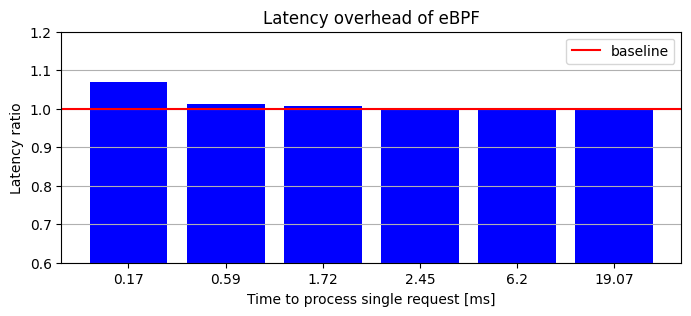

In [23]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Latency ratio")
# ax.bar([*range(6)], np.multiply(lat_diff_perc, 100), color="b")
ax.axhline(y=1, color='r', linestyle='-')
ax.bar([*range(6)], np.add(lat_diff_perc, 1), color="b")

ax.set_ylim(0.6, 1.2)
ax.set_xlabel("Time to process single request [ms]")
ax.set_title("Latency overhead of eBPF")
ax.set_xticklabels([0.17, 0.17, 0.59, 1.72, 2.45, 6.20, 19.07])
ax.grid(axis="y")
ax.legend(["baseline"])

/tmp/ipykernel_2435454/3733716345.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0.17, 0.17, 0.59, 1.72, 2.45, 6.20, 19.07])


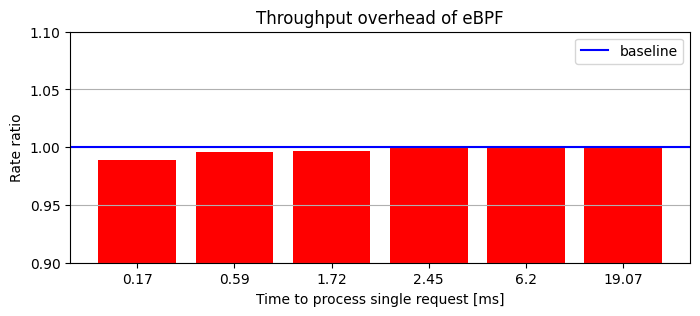

In [25]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Rate ratio")
# ax.bar([*range(6)], np.multiply(rate_diff_perc, -100), color="r")
ax.axhline(y=1, color='b', linestyle='-')
ax.bar([*range(6)], np.add(rate_diff_perc, 1), color="r")

ax.set_ylim(0.9, 1.1)
ax.set_xlabel("Time to process single request [ms]")
ax.set_title("Throughput overhead of eBPF")
ax.set_xticklabels([0.17, 0.17, 0.59, 1.72, 2.45, 6.20, 19.07])
ax.grid(axis="y")
ax.legend(["baseline"])

/tmp/ipykernel_2252248/4066686631.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 0, 1, 2, 3, 5, 20])


Text(0, 0.5, 'Rate decrease [rps]')

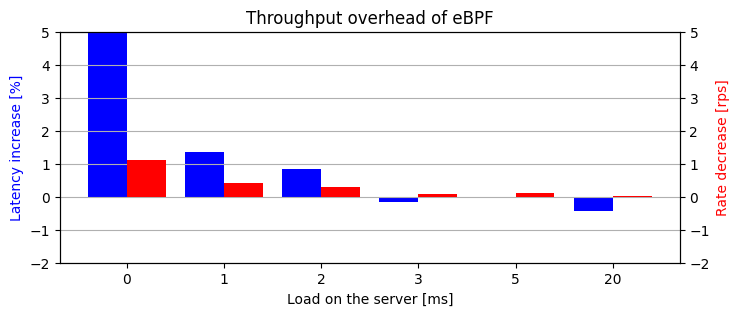

In [305]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Latency increase [%]", color = "b")
ax.bar(np.subtract([*range(6)], 0.2), np.multiply(lat_diff_perc, 100), width=0.4, color="b")
# ax.bar(np.add([*range(6)], 0.2), np.multiply(rate_diff_perc, -100), width=0.4)

ax.set_xlabel("Load on the server [ms]")
ax.set_title("Throughput overhead of eBPF")
ax.set_xticklabels([0, 0, 1, 2, 3, 5, 20])
ax.set_ylim([-2, 5])
ax.grid(axis="y")

ax2 = ax.twinx()
ax2.bar(np.add([*range(6)], 0.2), np.multiply(rate_diff_perc, -100), width=0.4, color = "r")
ax2.set_ylim([-2, 5])
ax2.set_ylabel("Rate decrease [rps]", color = "r")

### load 0

In [306]:
results1["0-"]["latencies"][0]

0.1670157142857143

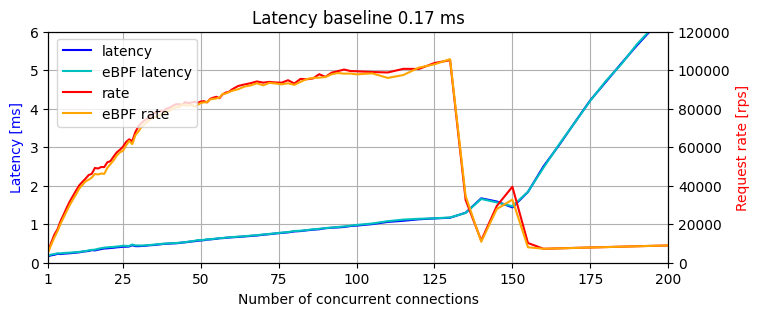

In [307]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST1, results1["0-"]["latencies"], 'b')
ax.plot(CONN_LIST1, results1["0-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 0.17 ms")
ax.set_xlim(1, 200)
ax.set_ylim(0, 6)
# ax.set_xticklabels([1, 20, 40, 60, 80, 100])
ax.set_xticks([1, *range(25, 201, 25)])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST1, results1["0-"]["rates"], 'r')
ax2.plot(CONN_LIST1, results1["0-"]["ebpf_rates"], 'orange')
ax2.set_ylim(0, 120000)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.32, .88))

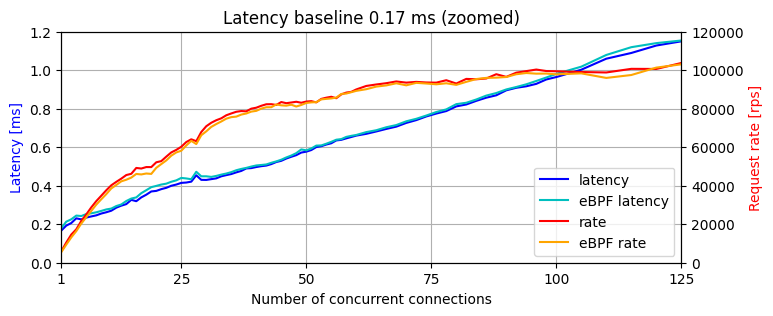

In [308]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST1, results1["0-"]["latencies"], 'b')
ax.plot(CONN_LIST1, results1["0-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 0.17 ms (zoomed)")
ax.set_xlim(1, 125)
ax.set_ylim(0, 1.2)
# ax.set_xticklabels([1, 20, 40, 60, 80, 100])
ax.set_xticks([1, *range(25, 126, 25)])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST1, results1["0-"]["rates"], 'r')
ax2.plot(CONN_LIST1, results1["0-"]["ebpf_rates"], 'orange')
ax2.set_ylim(0, 120000)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.9, .45))

### load 1

In [309]:
results2["1-"]["latencies"][0]

0.5944022222222223

/tmp/ipykernel_2252248/4220564695.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 20, 40, 60, 80])


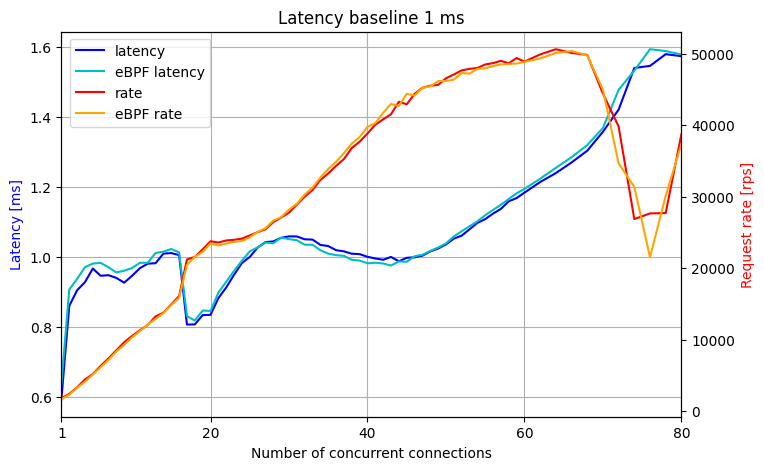

In [310]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST2, results2["1-"]["latencies"], 'b')
ax.plot(CONN_LIST2, results2["1-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 1 ms")
ax.set_xlim(1, 80)
# ax.set_ylim(0, 32.5)
ax.set_xticklabels([1, 20, 40, 60, 80])
ax.set_xticks([1, 20, 40, 60, 80])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST2, results2["1-"]["rates"], 'r')
ax2.plot(CONN_LIST2, results2["1-"]["ebpf_rates"], 'orange')
# ax2.set_ylim(0, 3250)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.32, .88))


### lead 2

In [311]:
results2["2-"]["latencies"][0]

1.7209225000000004

/tmp/ipykernel_2252248/3781143852.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 20, 40, 60, 80])


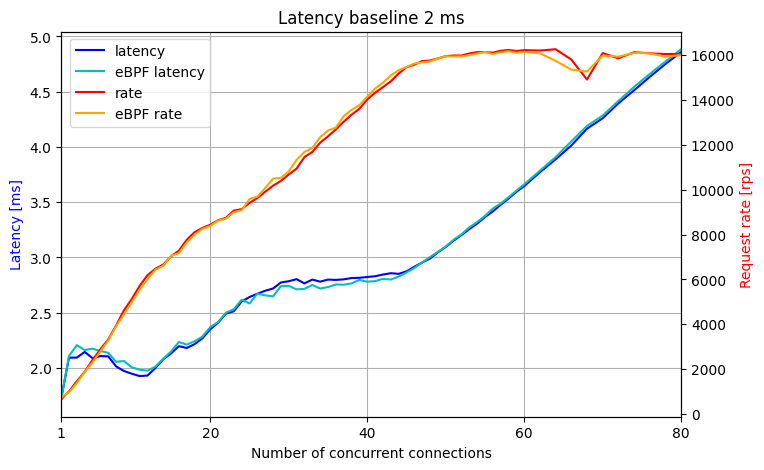

In [312]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST2, results2["2-"]["latencies"], 'b')
ax.plot(CONN_LIST2, results2["2-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 2 ms")
ax.set_xlim(1, 80)
# ax.set_ylim(0, 32.5)
ax.set_xticklabels([1, 20, 40, 60, 80])
ax.set_xticks([1, 20, 40, 60, 80])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST2, results2["2-"]["rates"], 'r')
ax2.plot(CONN_LIST2, results2["2-"]["ebpf_rates"], 'orange')
# ax2.set_ylim(0, 3250)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.32, .88))


### load 3

In [313]:
results2["3-"]["latencies"][0]

2.4526825000000003

/tmp/ipykernel_2252248/2159698982.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 20, 40, 60, 80])


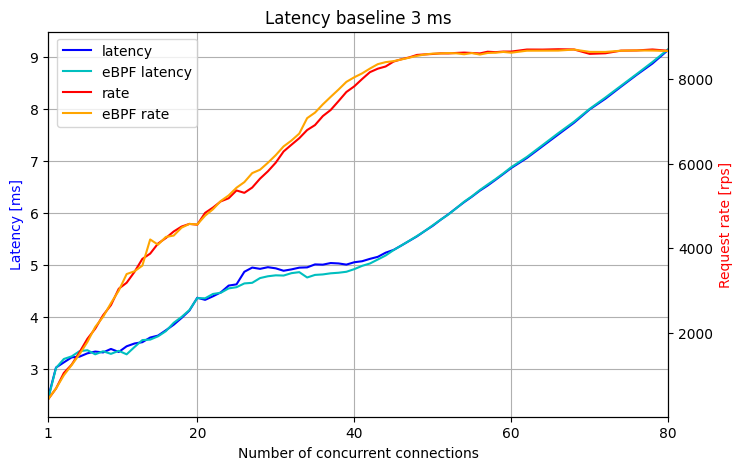

In [314]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST2, results2["3-"]["latencies"], 'b')
ax.plot(CONN_LIST2, results2["3-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 3 ms")
ax.set_xlim(1, 80)
# ax.set_ylim(0, 32.5)
ax.set_xticklabels([1, 20, 40, 60, 80])
ax.set_xticks([1, 20, 40, 60, 80])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST2, results2["3-"]["rates"], 'r')
ax2.plot(CONN_LIST2, results2["3-"]["ebpf_rates"], 'orange')
# ax2.set_ylim(0, 3250)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.32, .88))


### load 5

/tmp/ipykernel_2252248/1558102222.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 20, 40, 60, 80])


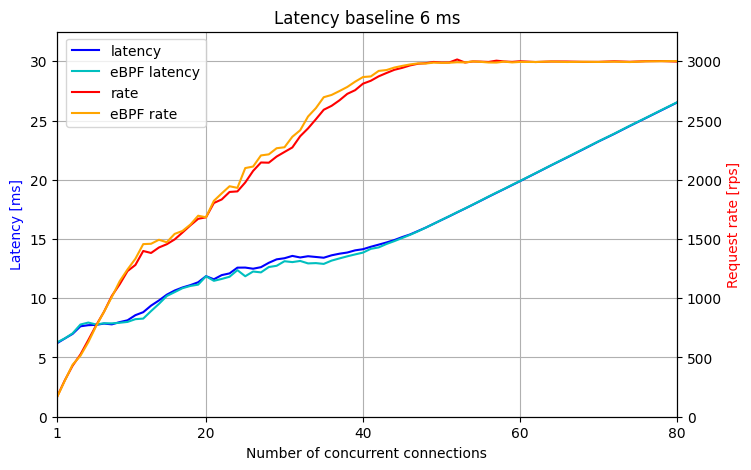

In [315]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST2, results2["5-"]["latencies"], 'b')
ax.plot(CONN_LIST2, results2["5-"]["ebpf_latencies"], 'c')

ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 6 ms")
ax.set_xlim(1, 80)
ax.set_ylim(0, 32.5)
ax.set_xticklabels([1, 20, 40, 60, 80])
ax.set_xticks([1, 20, 40, 60, 80])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST2, results2["5-"]["rates"], 'r')
ax2.plot(CONN_LIST2, results2["5-"]["ebpf_rates"], 'orange')
ax2.set_ylim(0, 3250)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.32, .88))

### load 20

In [316]:
results2["20-"]["latencies"][0]

19.071458

/tmp/ipykernel_2252248/3011083462.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 20, 40, 60, 80])


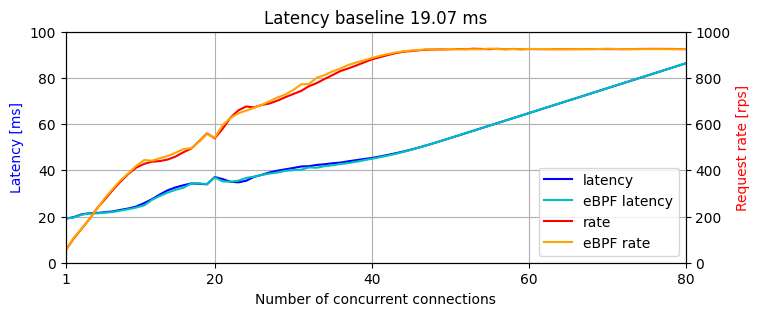

In [317]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_ylabel("Latency [ms]", color='b')
ax.plot(CONN_LIST2, results2["20-"]["latencies"], 'b')
ax.plot(CONN_LIST2, results2["20-"]["ebpf_latencies"], 'c')
ax.set_xlabel("Number of concurrent connections")
ax.set_title("Latency baseline 19.07 ms")
ax.set_xlim(1, 80)
ax.set_ylim(0, 100)
ax.set_xticklabels([1, 20, 40, 60, 80])
ax.set_xticks([1, 20, 40, 60, 80])
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Request rate [rps]", color='r')
ax2.plot(CONN_LIST2, results2["20-"]["rates"], 'r')
ax2.plot(CONN_LIST2, results2["20-"]["ebpf_rates"], 'orange')
ax2.set_ylim(0, 1000)
fig.legend(["latency", "eBPF latency", "rate", "eBPF rate"], bbox_to_anchor=(.9, .45))

In [318]:
# fig, ax = plt.subplots(figsize=(8,5))
# # for test in TEST_LIST2:
# #     ax.plot(CONN_LIST, results[test]["latencies"])
# ax.plot(CONN_LIST, [x * 100 for x in results["20-"]["latencies"]], 'b')
# # ax.legend(TEST_LIST2)
# ax.set_xlabel("Number of concurrent connections")
# # ax.set_ylabel("Latency increase [%]")
# ax.set_title("Baseline latency for single connection: ~ 160 us")
# # ax.set_xlim(1, 100)
# # ax.set_ylim(-4, 12)
# # ax.set_xticklabels([1, 20, 40, 60, 80, 100])
# # ax.set_xticks([1, 20, 40, 60, 80, 100])
# ax.grid()
# ax.set_ylabel("[%]")
# ax.plot(CONN_LIST, [x * 100 for x in results["20-"]["rates"]], 'r')
# ax.legend(["Latency increase", "Requests per second decrease"])